In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

'''
# data preprocessing step
'''
pd.set_option('display.width', 200) # for display width

# 1. read data config(*.csv) file
# [note] *.xlsx must be converted to csv format because of the *.xlsx format does not support
data_config = pd.read_csv('./data/train/data_config.csv', header=0, index_col=0)
print("***** data configurations *****")
print("- config data shape : ", data_config.shape)

# 2. read all data logs (FSR matrix, Seat Sensor Data)
fsr_matrix_data = {}
seat_data = {}

for idx in data_config.index:
    fsr_filepath = './data/train/'+data_config.loc[idx, "fsr_matrix_1d_datafile"]
    seat_filepath = './data/train/'+data_config.loc[idx, "seat_datafile"]
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    tmp_fsr_data = pd.read_csv(fsr_filepath, header=0, index_col=False)
    tmp_seat_data = pd.read_csv(seat_filepath, header=0, index_col=False)
    fsr_matrix_data[idx] = tmp_fsr_data.iloc[:,0:] # slice by the end of column
    seat_data[idx] = tmp_seat_data


***** data configurations *****
- config data shape :  (19, 12)
1 ) read data files :  ./data/train/20210303T160024-1dm.csv , ./data/train/data_01m.csv
2 ) read data files :  ./data/train/20210310T104529-1dm.csv , ./data/train/data_02m.csv
3 ) read data files :  ./data/train/20210310T110616-1dm.csv , ./data/train/data_03m.csv
4 ) read data files :  ./data/train/20210318T170103-1dm.csv , ./data/train/data_04m.csv
5 ) read data files :  ./data/train/20210310T153307-1dm.csv , ./data/train/data_05m.csv
6 ) read data files :  ./data/train/20210310T154900-1dm.csv , ./data/train/data_06m.csv
7 ) read data files :  ./data/train/20210311T131751-1dm.csv , ./data/train/data_07m.csv
8 ) read data files :  ./data/train/20210311T134516-1dm.csv , ./data/train/data_08m.csv
9 ) read data files :  ./data/train/20210311T150952-1dm.csv , ./data/train/data_09m.csv
10 ) read data files :  ./data/train/20210311T153746-1dm.csv , ./data/train/data_10m.csv
11 ) read data files :  ./data/train/20210311T154809-1d

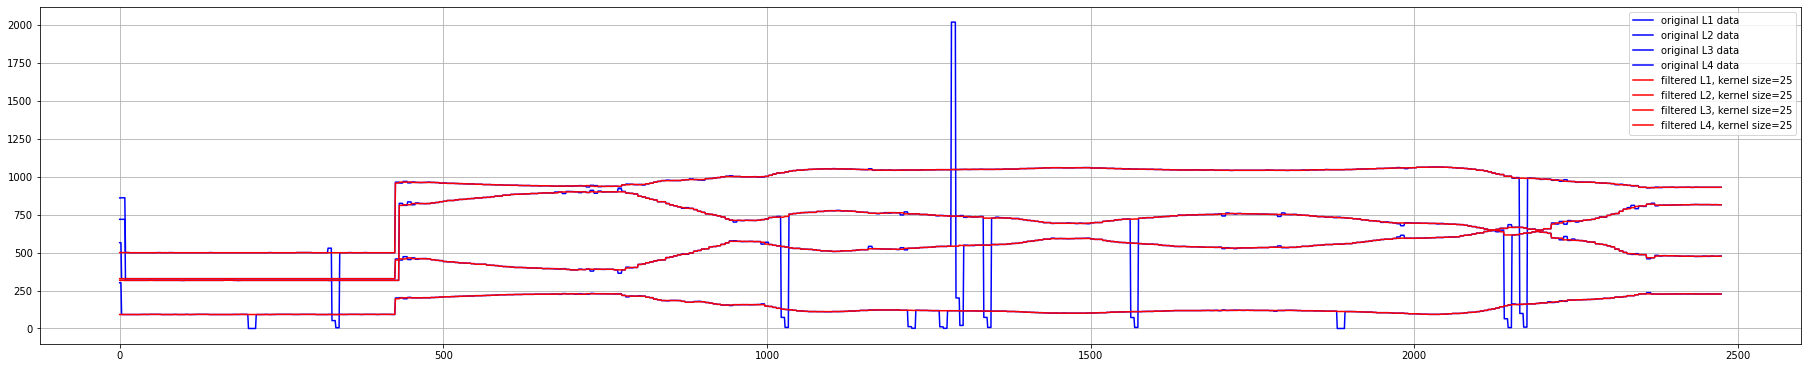

In [35]:
# Seat Loadcell Filtering
# Applied : Gaussian Filter

from scipy.signal import medfilt

_id = 3
seat_loadcell = seat_data[_id].loc[:,["Seat L1", "Seat L2", "Seat L3", "Seat L4"]]

# original
x1 = seat_loadcell["Seat L1"].values
x2 = seat_loadcell["Seat L2"].values
x3 = seat_loadcell["Seat L3"].values
x4 = seat_loadcell["Seat L4"].values

# median filtering
kernel_size = 25
seat_loadcell["Seat L1"] = medfilt(seat_loadcell["Seat L1"].values, kernel_size)
seat_loadcell["Seat L2"] = medfilt(seat_loadcell["Seat L2"].values, kernel_size)
seat_loadcell["Seat L3"] = medfilt(seat_loadcell["Seat L3"].values, kernel_size)
seat_loadcell["Seat L4"] = medfilt(seat_loadcell["Seat L4"].values, kernel_size)

# plot
plt.figure(figsize=(25,5), constrained_layout=True)
plt.plot(x1, 'b', label='original L1 data')
plt.plot(x2, 'b', label='original L2 data')
plt.plot(x3, 'b', label='original L3 data')
plt.plot(x4, 'b', label='original L4 data')

plt.plot(seat_loadcell["Seat L1"], 'r', label='filtered L1, kernel size=25')
plt.plot(seat_loadcell["Seat L2"], 'r', label='filtered L2, kernel size=25')
plt.plot(seat_loadcell["Seat L3"], 'r', label='filtered L3, kernel size=25')
plt.plot(seat_loadcell["Seat L4"], 'r', label='filtered L4, kernel size=25')

plt.legend()
plt.grid()
plt.show()



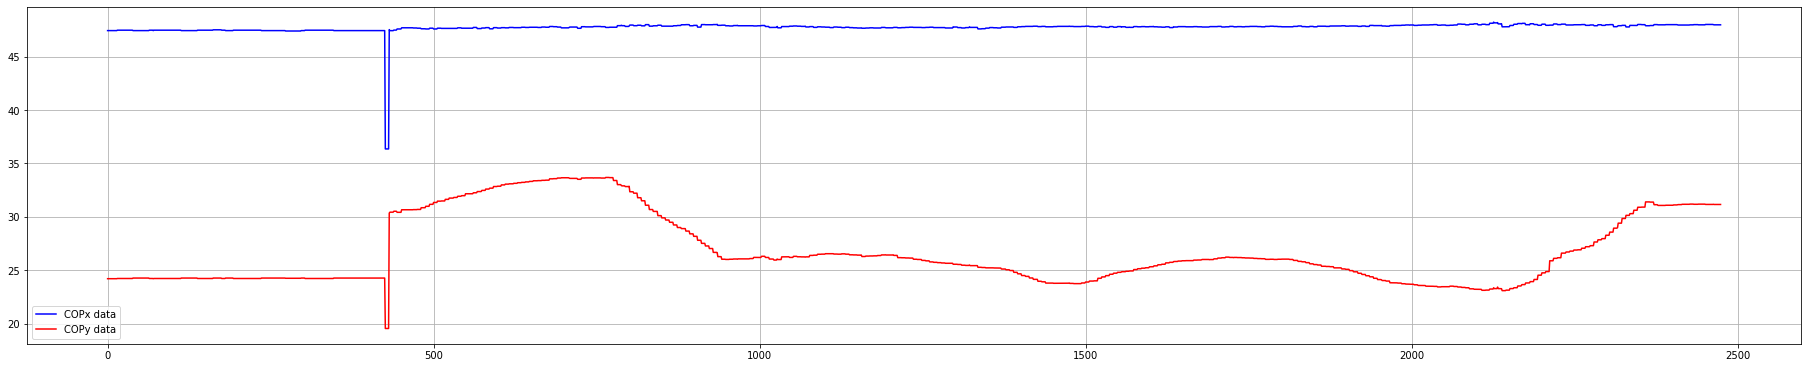

<ipython-input-32-757bc3a35762>:50: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig_cop_loadcell.tight_layout()


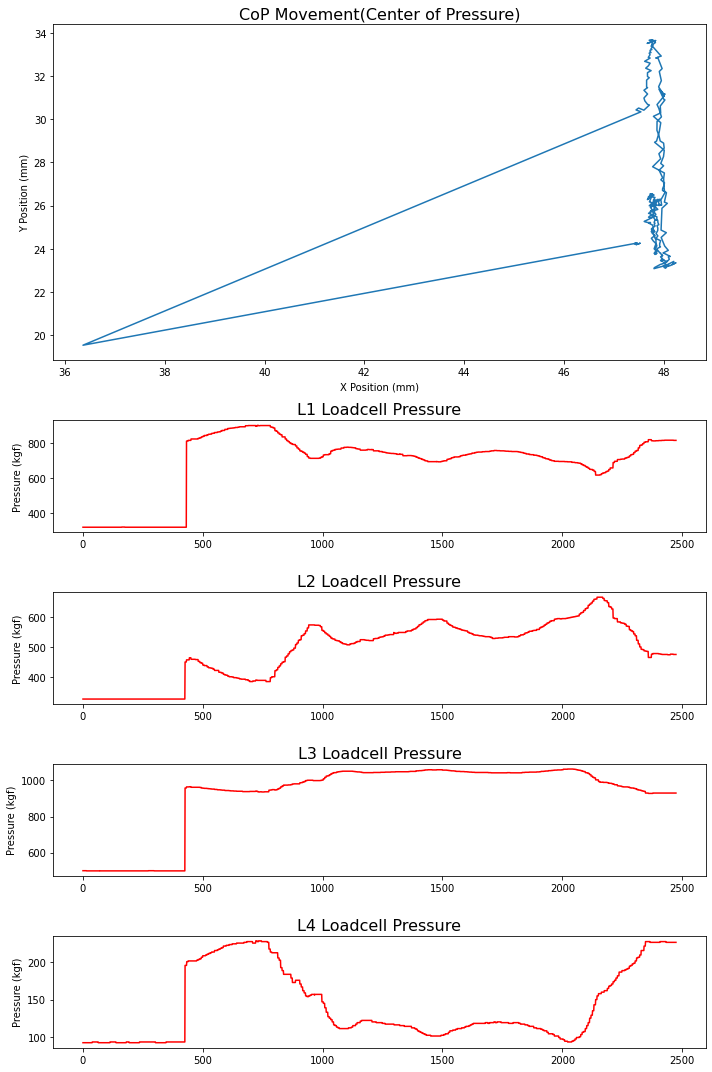

In [32]:
# Movement of Center of Pressure
# extract seat loadcell data
_id = 2 #index of data config

# seat_loadcell = seat_data[_id].loc[:,["Seat L1", "Seat L2", "Seat L3", "Seat L4"]]
LPos = {"Seat L1":(455,366), "Seat L2":(455,0), "Seat L3":(0,0), "Seat L4":(0,366)}
seat_loadcell["sum"]=seat_loadcell.sum(axis=1)

COPx = (seat_loadcell["Seat L1"]*LPos["Seat L1"][0]+seat_loadcell["Seat L2"]*LPos["Seat L2"][0]+seat_loadcell["Seat L3"]*LPos["Seat L3"][0]+seat_loadcell["Seat L4"]*LPos["Seat L4"][0])/seat_loadcell["sum"]
COPy = (seat_loadcell["Seat L1"]*LPos["Seat L1"][1]+seat_loadcell["Seat L2"]*LPos["Seat L2"][1]+seat_loadcell["Seat L3"]*LPos["Seat L3"][1]+seat_loadcell["Seat L4"]*LPos["Seat L4"][1])/seat_loadcell["sum"]

# Plotting COPx
plt.figure(figsize=(25,5), constrained_layout=True)
plt.plot(COPx, 'b', label='COPx data')
plt.plot(COPy, 'r', label='COPy data')

plt.legend()
plt.grid()
plt.show()

# plot COP & seat loadcell
fig_cop_loadcell = plt.figure(figsize=(10,15), constrained_layout=True)
gs = gridspec.GridSpec(nrows=5, ncols=1, height_ratios=[3,1,1,1,1], width_ratios=[1])
fig_cop = plt.subplot(gs[0])
fig_cop.plot(COPx, COPy)
fig_cop.set_title('CoP Movement(Center of Pressure)', fontsize=16)
fig_cop.set_xlabel('X Position (mm)')
fig_cop.set_ylabel('Y Position (mm)')

fig_seat_l1 = plt.subplot(gs[1])
fig_seat_l1.plot(seat_loadcell["Seat L1"], '-', color='red')
fig_seat_l1.set_title('L1 Loadcell Pressure', fontsize=16)
fig_seat_l1.set_ylabel('Pressure (kgf)')

fig_seat_l2 = plt.subplot(gs[2])
fig_seat_l2.plot(seat_loadcell["Seat L2"], '-', color='red')
fig_seat_l2.set_title('L2 Loadcell Pressure', fontsize=16)
fig_seat_l2.set_ylabel('Pressure (kgf)')

fig_seat_l3 = plt.subplot(gs[3])
fig_seat_l3.plot(seat_loadcell["Seat L3"], '-', color='red')
fig_seat_l3.set_title('L3 Loadcell Pressure', fontsize=16)
fig_seat_l3.set_ylabel('Pressure (kgf)')

fig_seat_l4 = plt.subplot(gs[4])
fig_seat_l4.plot(seat_loadcell["Seat L4"], '-', color='red')
fig_seat_l4.set_title('L4 Loadcell Pressure', fontsize=16)
fig_seat_l4.set_ylabel('Pressure (kgf)')

fig_cop_loadcell.tight_layout()
plt.show()